In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler

In [246]:
master_df = pd.read_csv('../../MyData/master.csv')
globaltop50 = pd.read_csv('../../MyData/spotifytoptracks.csv')

In [247]:
master_df.head()

,end_time,artist_name,track_name,milliseconds_played,minutes_played,date,time,day,month,danceability,...,key,loud,mode,speech,acoustics,instrumentals,liveness,valence,tempo,track_id
0,2020-05-14 21:52:00,OneRepublic,Apologize,188270,3.14,2020-05-14,21:52:00,Thursday,May,0.596,...,8.0,-6.127,1.0,0.0338,0.341,0.000021,0.1020,0.493,118.031,3e9VtBXljd8vNUT5dMq62w
1,2020-05-14 21:55:00,Y2K,Lalala,160626,2.68,2020-05-14,21:55:00,Thursday,May,0.843,...,2.0,-7.899,1.0,0.0846,0.178,0.000000,0.1370,0.495,129.972,51Fjme0JiitpyXKuyQiCDo
2,2020-05-14 21:58:00,XXXTENTACION,SAD!,99880,1.66,2020-05-14,21:58:00,Thursday,May,0.740,...,8.0,-4.880,1.0,0.1450,0.258,0.003720,0.1230,0.473,75.023,3ee8Jmje8o58CHK66QrVC2
3,2020-05-15 01:13:00,Camila Cabello,My Oh My (feat. DaBaby),170746,2.85,2020-05-15,01:13:00,Friday,May,0.724,...,8.0,-6.024,1.0,0.0296,0.018,0.000013,0.0887,0.383,105.046,3yOlyBJuViE2YSGn3nVE1K
4,2020-05-15 01:17:00,Post Malone,Circles,215280,3.59,2020-05-15,01:17:00,Friday,May,0.695,...,0.0,-3.497,1.0,0.0395,0.192,0.002440,0.0863,0.553,120.042,21jGcNKet2qwijlDFuPiPb


### Preparing Data

In [248]:
# create a new feature to check boringness of the song
def calculate_boring(row):
    return row.loud + row.tempo + row.energy + row.danceability

In [249]:
globaltop50.rename(columns={'loudness': 'loud', 'acousticness': 'acoustics', 'speechiness': 'speech',
    'instrumentalness': 'instrumentals', 'artist': 'artist_name'}, inplace=True)
globaltop50['minutes_played'] = round(globaltop50['duration_ms'].divide(60000),2)

try:
    globaltop50.drop(columns=['duration_ms', 'Unnamed: 0'], inplace=True)
except KeyError:
    pass

# Checking if my music is boring
globaltop50['boring'] = globaltop50.apply(calculate_boring, axis=1)


globaltop50['source'] = 'Global top 50' 

bins = [0, 0.5, 0.6, 1]
essenses = ['Low', 'Neutral', 'High']
globaltop50['essense'] = pd.cut(globaltop50['valence'], bins, labels=essenses)
globaltop50.head()

,artist_name,album,track_name,track_id,energy,danceability,key,loud,acoustics,speech,instrumentals,liveness,valence,tempo,genre,minutes_played,boring,source,essense
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,R&B/Soul,3.33,166.315,Global top 50,Low
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,Alternative/Indie,3.50,93.095,Global top 50,Neutral
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,Hip-Hop/Rap,3.28,111.766,Global top 50,High
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,Dance/Electronic,2.94,118.011,Global top 50,High
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,Nu-disco,3.05,121.015,Global top 50,High


In [250]:
col_list = ['track_id', 'track_name', 'artist_name', 'energy', 'danceability',
       'key', 'loud', 'acoustics', 'speech', 'instrumentals',
       'liveness', 'valence', 'tempo']

# creating dataframe with my top 50 songs
top50 = pd.DataFrame(master_df.groupby(by=col_list)['minutes_played'].sum().sort_values(ascending=False)[:50]).reset_index()

# Checking if my music is boring
top50['boring'] = top50.apply(calculate_boring, axis=1)

top50['source'] = 'My top 50'

bins = [0, 0.5, 0.6, 1]
essenses = ['Low', 'Neutral', 'High']

top50['essense'] = pd.cut(top50['valence'], bins, labels=essenses)

In [251]:
top50.head()

,track_id,track_name,artist_name,energy,danceability,key,loud,acoustics,speech,instrumentals,liveness,valence,tempo,minutes_played,boring,source,essense
0,7yqGJP1pQ1jc4MNAdZW4gR,Modern Loneliness - Ritviz Remix,Lauv,0.543,0.681,9.0,-7.784,0.00644,0.2040,0.000002,0.223,0.415,160.019,124.59,153.459,My top 50,Low
1,1fzXNZPqinQMQRrB7sJ8Gq,Emptiness and Aitebar - Live,Abdullah Qureshi,0.459,0.290,3.0,-8.890,0.31800,0.0274,0.000019,0.699,0.166,143.144,120.88,135.003,My top 50,Low
2,3Q9YJqLNCkDbpBLk9Dmnl8,Julali Gaath Ga,Shalmali Kholgade,0.320,0.739,5.0,-9.845,0.33100,0.1680,0.000002,0.140,0.502,82.661,110.55,73.875,My top 50,Neutral
3,5wxurz8J6YlyQRNnGN8zXS,Nervous,Gavin James,0.623,0.841,0.0,-6.760,0.04040,0.0776,0.000000,0.126,0.744,121.983,108.14,116.687,My top 50,High
4,6c6Pr4ALb2SD7j7UnS5YDE,VIDA LOCA,Black Eyed Peas,0.618,0.885,10.0,-5.705,0.02250,0.0544,0.000022,0.325,0.769,127.983,107.42,123.781,My top 50,High


### Explore Data

In [252]:
frames = [globaltop50, top50]
temp = pd.concat(frames)

# Scaling the audio features from range 0-1
numerical = temp.select_dtypes(include='float64').columns
temp.loc[:,numerical] = MinMaxScaler(feature_range=(0,1)).fit_transform(temp.loc[:,numerical])

In [253]:
temp_columns = ['energy', 'danceability', 'loud', 'acoustics', 'source']
temp_df = temp[temp_columns]

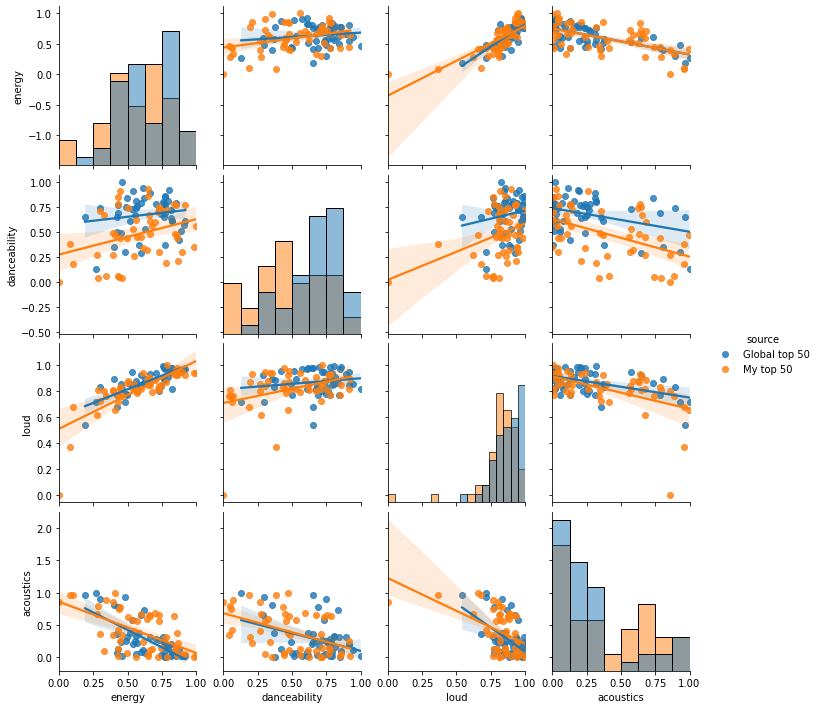

In [254]:
sns.pairplot(temp_df, hue='source', diag_kind='hist', kind='reg')

In [255]:
columns = ['speech', 'liveness', 'valence', 'tempo', 'source']
temp_df2 = temp[columns]

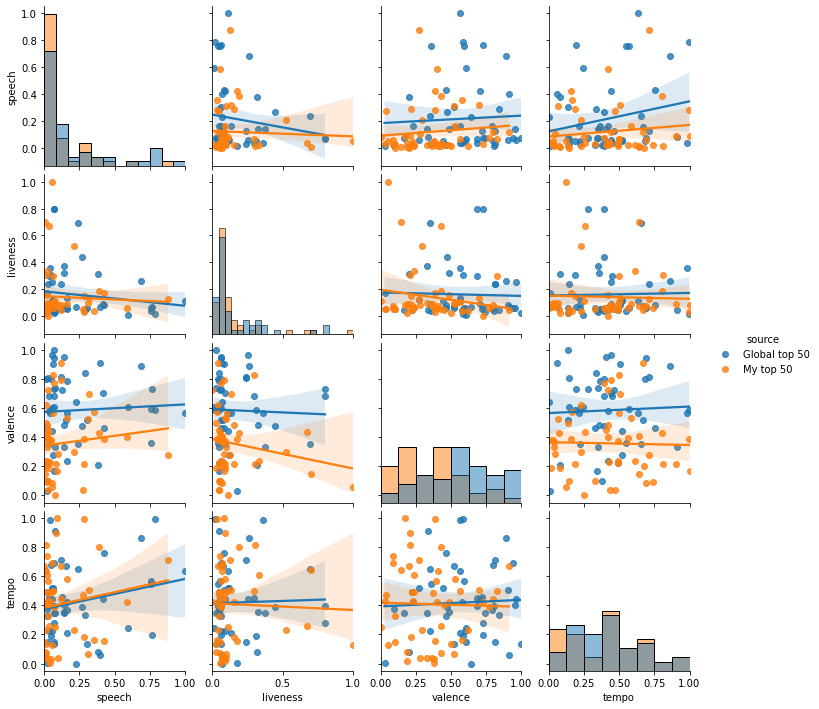

In [256]:
sns.pairplot(temp_df2, hue='source', diag_kind='hist', kind='reg')

In [257]:
me_mean_df = top50.mean(axis=0).to_frame().reset_index().rename(columns={'index':'column',0:'mean_values'})
global_mean_df = globaltop50.mean(axis=0).to_frame().reset_index().rename(columns={'index':'column',0:'mean_values'})

In [258]:
local_ = me_mean_df[~me_mean_df['column'].isin(['tempo', 'minutes_played','key','loud'])]
global_ = global_mean_df[~global_mean_df['column'].isin(['tempo', 'minutes_played','key','loud'])]

# fig = go.Figure()

# fig.add_trace(go.Bar(
#             x=local_['mean_values'],
#             y=local_['column'],
#             orientation='h',
#             name='My Top 50'))

# fig.add_trace(go.Bar(
#             x=global_['mean_values'],
#             y=global_['column'],
#             orientation='h',
#             name='Global Top 50'))

# fig.update_layout(title='Diversity of Music')

# fig.show()

In [259]:
categories = ['energy', 'danceability', 'acoutics', 'speech', 'instrumentals', 'liveness', 'valence']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=local_['mean_values'],
      theta=categories,
      fill='toself',
      name='My Top 50'
))

fig.add_trace(go.Scatterpolar(
      r=global_['mean_values'],
      theta=categories,
      fill='toself',
      name='Global Top 50'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8]
    )),
  showlegend=True,
  title= 'Diversity of Music (Global vs My Top 50 songs)'
)

fig.show()

Audio features of my top 50 are distinct from the global top 50! I prefer low-spirited, acoustics songs having lower energy levels, while worldwide hits suggest people incline towards fast-paced, energetic sings that they can dance. 

In [275]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=globaltop50['boring'], name='Global top 50'))
fig.add_trace(go.Histogram(x=top50['boring'], name='My top 50'))

# Overlay both histograms
fig.update_layout(barmode='stack', title='Boringness (Global vs My top 50 songs)')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()


What is a boring song? A song might be boring for me but could be a top song for others.    
Based on this thesis, I consider what kind of music I would like to hear when I'm at a party.    
A song that brings out the energy in me and is loud for me to get in the mood to dance.   
So I came up with an equation to sum all these features.